 Part B: Customer Churn Prediction

Deliverables

 1. A data exploration and preprocessing notebook or report that analyzes the dataset, handles missing values,  and prepares the data for modeling.

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.simplefilter(action='ignore')

# Load the dataset
file_path = "customer_data.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


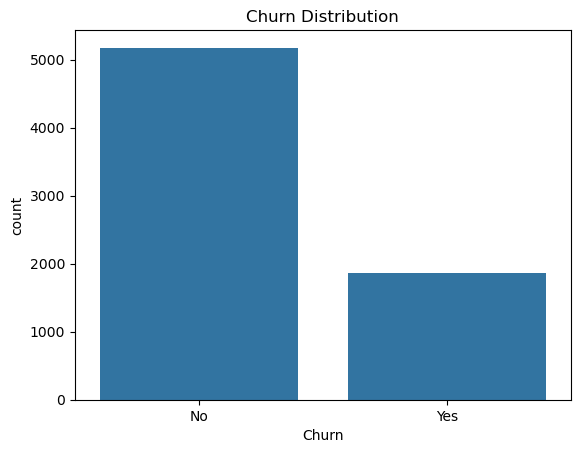

In [86]:
# Visualizing Churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [88]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [90]:
# Handle missing values in TotalCharges by filling them with the median value
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Drop the customerID column as it is not useful for prediction
df.drop(columns=["customerID"], inplace=True)

# Convert categorical variables with "Yes/No" values to binary (1/0)
yes_no_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in yes_no_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

# Convert gender to binary (Male=1, Female=0)
df["gender"] = df["gender"].map({"Male": 1, "Female": 0})

# Keep SeniorCitizen as a numerical feature
df["SeniorCitizen"] = df["SeniorCitizen"].astype(int)

# Identify categorical variables with more than two unique values
multi_category_cols = ["Contract", "InternetService", "PaymentMethod", "MultipleLines", "OnlineSecurity", 
                       "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

# Apply one-hot encoding to multi-category variables
df = pd.get_dummies(df, columns=multi_category_cols, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Display the processed dataset info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int32  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   float64
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994242,0,...,False,True,False,False,False,False,False,False,False,False
1,1,0,0,0,0.066327,1,0,-0.259629,-0.173244,0,...,False,False,False,True,False,False,False,False,False,False
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1,...,False,True,False,False,False,False,False,False,False,False
3,1,0,0,0,0.514251,0,0,-0.746535,-0.194766,0,...,False,False,False,True,False,True,False,False,False,False
4,0,0,0,0,-1.236724,1,1,0.197365,-0.940470,1,...,False,False,False,False,False,False,False,False,False,False


2.  A machine learning model capable of predicting customer churn. 

In [93]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Split the data into features and target variable
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

3. An evaluation of model performance using appropriate metrics (such as accuracy, precision, recall, F1 score, etc.)

In [96]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7934705464868701
Precision: 0.6553030303030303
Recall: 0.46380697050938335
F1 Score: 0.543171114599686
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [98]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred_best = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print("Best Model Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Model Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}
Accuracy: 0.808374733853797
Precision: 0.6872727272727273
Recall: 0.5067024128686327
F1 Score: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



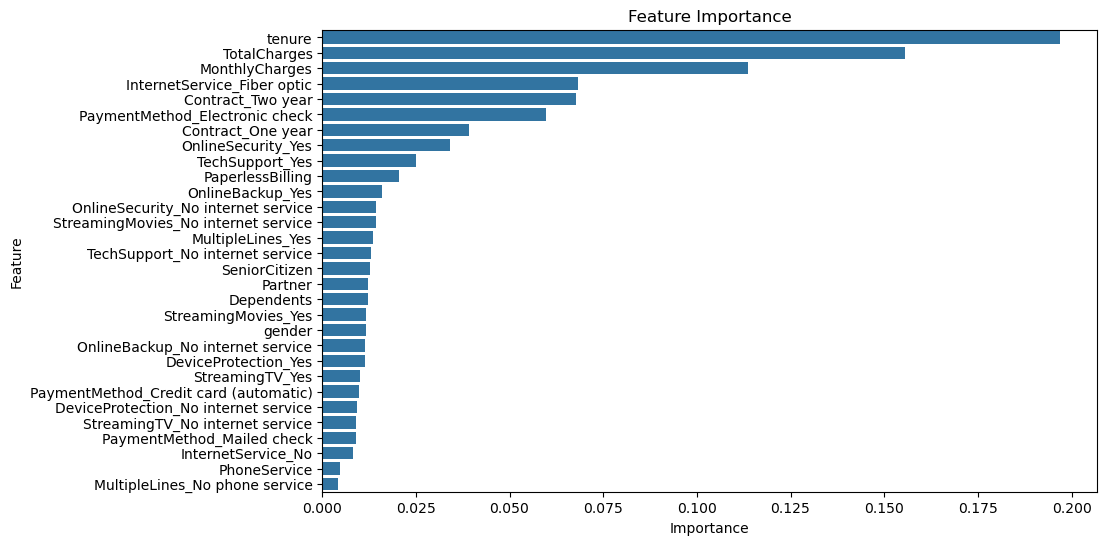

In [100]:
# Feature importance analysis
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

In [114]:
# Function to predict churn for new data
def predict_churn(new_data):
    new_data = pd.DataFrame(new_data)
    new_data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(new_data[['tenure', 'MonthlyCharges', 'TotalCharges']])
    return best_model.predict(new_data)

# Example new customer data
new_customer = {
    'gender': [1],  
    'SeniorCitizen': [0],  
    'Partner': [1],
    'Dependents': [0],
    'tenure': [12],  
    'PhoneService': [1],  
    'PaperlessBilling': [1],  
    'MonthlyCharges': [50.0],  
    'TotalCharges': [600.0],  
    'Contract_One year': [0],  
    'Contract_Two year': [1],  
    'InternetService_Fiber optic': [1],  
    'InternetService_No': [0],  
    'PaymentMethod_Credit card (automatic)': [0],  
    'PaymentMethod_Electronic check': [1],  
    'PaymentMethod_Mailed check': [0],  
    'MultipleLines_No phone service': [0],  
    'MultipleLines_Yes': [1],  
    'OnlineSecurity_No internet service': [0],  
    'OnlineSecurity_Yes': [1],  
    'OnlineBackup_No internet service': [0],  
    'OnlineBackup_Yes': [1],  
    'DeviceProtection_No internet service': [0],  
    'DeviceProtection_Yes': [1],  
    'TechSupport_No internet service': [0],  
    'TechSupport_Yes': [1],  
    'StreamingTV_No internet service': [0],  
    'StreamingTV_Yes': [1],  
    'StreamingMovies_No internet service': [0],  
    'StreamingMovies_Yes': [1]
}

# Convert to DataFrame and predict
new_customer_df = pd.DataFrame(new_customer)
prediction = predict_churn(new_customer_df)

# Print prediction result
print("Predicted Churn:", "Yes" if prediction[0] == 1 else "No")

Predicted Churn: No


--- Interpretation and Actionable Insights ---
1. High Monthly Charges and Low Tenure are strong indicators of churn.
   - Action: Offer discounts or loyalty programs to retain customers early.
2. Customers with No Internet Service are less likely to churn.
   - Action: Focus retention efforts on high-risk segments like fiber-optic users.
3. Paperless Billing and Electronic Check payment methods correlate with higher churn.
   - Action: Encourage automatic payments or credit card-based payments to reduce churn.

In [117]:
# Display the processed dataset info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int32  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   float64
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994242,0,...,False,True,False,False,False,False,False,False,False,False
1,1,0,0,0,0.066327,1,0,-0.259629,-0.173244,0,...,False,False,False,True,False,False,False,False,False,False
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1,...,False,True,False,False,False,False,False,False,False,False
3,1,0,0,0,0.514251,0,0,-0.746535,-0.194766,0,...,False,False,False,True,False,True,False,False,False,False
4,0,0,0,0,-1.236724,1,1,0.197365,-0.940470,1,...,False,False,False,False,False,False,False,False,False,False


4. Final video clip of candidate summarizing the entire process of the project as the
 presentation.